<a href="https://colab.research.google.com/github/Vaycold/Python_DL/blob/main/cifar%20Dataset%20%EC%97%B0%EC%8A%B5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data load

In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
from natsort import natsorted
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
drive_path = '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar'

In [8]:
train_paths = sorted(glob(drive_path + '/train/*.png'))

In [4]:
test_paths  = sorted(glob(drive_path + '/test/*.png'))

In [9]:
len(train_paths) , len(test_paths)

(50000, 10000)

In [10]:
path = train_paths[0]

## Get the Label(Class)

In [11]:
fname = os.path.basename(path)
print('file name  : ',fname)

cls_name = fname.replace('.png','').split('_')[-1]
print('class name  : ',cls_name)

file name  :  0_frog.png
class name  :  frog


In [12]:
def get_class_name(path) :
    return os.path.basename(path).replace('.png','').split('_')[-1] 

In [13]:
# CHECK THE #. CLASS 
class_names = []

for path in train_paths :
    class_names.append(get_class_name(path))

In [14]:
len(np.unique(class_names))

10

In [15]:
uniques = np.unique(class_names)
uniques

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

## tf.data 사용해보기


In [16]:
path = train_paths[0]

In [17]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
image.shape

TensorShape([32, 32, 3])

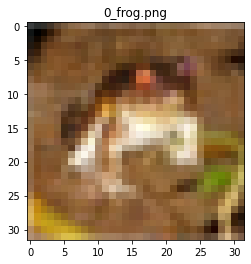

In [18]:
# 그냥 데이터 확인해서 해보는 방법
plt.title(os.path.basename(path))
plt.imshow(image)
plt.show()

In [19]:
# tf.data

train_paths[:10]

['/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/0_frog.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10000_automobile.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10001_frog.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10002_frog.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10003_ship.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10004_ship.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10005_cat.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10006_deer.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10007_frog.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10008_airplane.png']

In [20]:
def read_image(path) :
    return tf.io.decode_image(tf.io.read_file(path))

In [21]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image) # 데이터를 읽는것임
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

In [22]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image) # 데이터를 읽는것임
dataset = dataset.batch(batch_size=8) # 배치로 묶기
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([8, 32, 32, 3])

In [24]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image) # 데이터를 읽는것임
dataset = dataset.batch(batch_size=8) # 배치로 묶기
#dataset = dataset.shuffle(buffer_size=len(train_paths)) # 데이터 셔플 buffer_size 매뉴얼은 train_path의 갯수로 하면 너무 오래걸림...
dataset = dataset.shuffle(buffer_size=30)


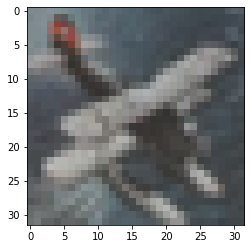

In [25]:
tf_image = next(iter(dataset))
plt.imshow(tf_image[0])
plt.show()

In [27]:
# label하고 같이 넣어보자

In [31]:
label_names = [get_class_name(path) for path in train_paths]

In [35]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [46]:
# 원핫인코딩을 할 수 있는 함수를 구현해보자
def one_hot(label) :
    return np.array(class_names == label, np.uint8)

In [37]:
train_paths[:10]

['/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/0_frog.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10000_automobile.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10001_frog.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10002_frog.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10003_ship.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10004_ship.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10005_cat.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10006_deer.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10007_frog.png',
 '/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/10008_airplane.png']

In [38]:
label_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [ ]:
def read_image(path) :
    return tf.io.decode_image(tf.io.read_file(path))

In [39]:
def read_image_label(path, label) :
    return tf.io.decode_image(tf.io.read_file(path)), label


In [41]:
dataset = tf.data.Dataset.from_tensor_slices((train_paths, label_names))
dataset = dataset.map(read_image_label) # 이젠 read_image 함수를 쓸 수 없음, read_image는 input이 한개이기 때문 그렇지만 지금은 두개의 인풋이다. 
dataset = dataset.batch(batch_size = 8)
dataset = dataset.repeat()  # 이걸 안 넣으면 한번 들어가고 끝나버림


In [42]:
image, label = next(iter(dataset))
image.shape, label.shape

(TensorShape([8, 32, 32, 3]), TensorShape([8]))

In [43]:
label[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

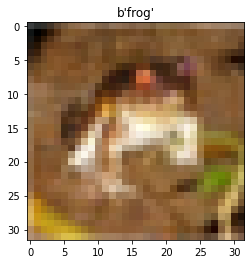

In [44]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

## tensorflow 함수로 label 얻기

In [47]:
one_hot('frog')

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [48]:
path

'/content/MyDrive/MyDrive/fastcampus/DL_300/이미지분석/dataset/cifar/train/0_frog.png'

In [51]:
fname = tf.strings.split(path, '_')[-1]
fname

<tf.Tensor: shape=(), dtype=string, numpy=b'frog.png'>

In [53]:
cls_name = tf.strings.regex_replace(fname, '.png','')
cls_name

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

In [54]:
class_names == cls_name

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False,  True, False, False,
       False])>

In [56]:
onehot_encoding = tf.cast(class_names == cls_name, tf.uint8)
onehot_encoding

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

In [57]:
def get_label(path) : 
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png','')
    onehot_encoding = tf.cast(class_names == cls_name, tf.uint8)
    return onehot_encoding

In [59]:
def read_image_label(path) :

    return tf.io.decode_image(tf.io.read_file(path)), get_label(path)


In [60]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image_label) # 이젠 read_image 함수를 쓸 수 없음, read_image는 input이 한개이기 때문 그렇지만 지금은 두개의 인풋이다. 
dataset = dataset.batch(batch_size = 8)
dataset = dataset.repeat() 


In [61]:
image, label = next(iter(dataset))

In [62]:
image.shape, label.shape

(TensorShape([8, 32, 32, 3]), TensorShape([8, 10]))